<a href="https://colab.research.google.com/github/diego-s-fernandes/acoesnaoorcamentarias/blob/main/C%C3%B3pia_de_tratamento_ANOr_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd

# IMPORTANT: The file was found directly in the Colab environment, not in Google Drive.
# Updating the path to reflect its actual location.
file_path = '/content/anor-2024.xlsx' # <--- UPDATED PATH

try:
    df_excel = pd.read_excel(file_path)
    print(f"Successfully loaded '{file_path}'")
    display(df_excel.head()) # Display the first 5 rows to confirm it loaded
except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found. Please double-check the path and try again.")
except Exception as e:
    print(f"An error occurred while reading the Excel file: {e}")

Successfully loaded '/content/anor-2024.xlsx'


,Exercício_x,Programa,Ação Não-Orçamentária,Título,Descrição,Tipo,Responsável pela informação,Tributo,Valor Total,Valor Previsto para o 1o. Ano do PPA,...,Total de beneficiários previstos 4° Ano de PPA,Momento,Novo,Excluído,Título_Programa,Tipo_Programa,Código do órgão,Nome do órgão,Órgão,Plano
0,2024,3107,010E,NaN,Aerogeradores - Energia - Redução a zero das a...,Subsídio Tributário,31000,Outros,9.377953e+08,2.148967e+08,...,NaN,3000,Sim,Não,Transição Energética,Finalístico,32000,Ministério de Minas e Energia,32000 - Ministério de Minas e Energia,PPA 2024-2027
1,2024,1144,010F,NaN,Agricultura e Agroindústria - Defensivos agríc...,Subsídio Tributário,31000,Outros,2.721001e+10,6.235201e+09,...,NaN,3000,Sim,Não,Agropecuária Sustentável,Finalístico,22000,Ministério da Agricultura e Pecuária,22000 - Ministério da Agricultura e Pecuária,PPA 2024-2027
2,2024,5133,010G,NaN,Agricultura e Agroindústria - Desoneração Cest...,Subsídio Tributário,31000,Outros,1.612574e+11,3.695229e+10,...,NaN,3000,Sim,Não,Segurança Alimentar e Nutricional e Combate à ...,Finalístico,55000,Ministério do Desenvolvimento e Assistência So...,55000 - Ministério do Desenvolvimento e Assist...,PPA 2024-2027
3,2024,3102,010H,NaN,Água Mineral - Saúde - Redução a zero das alíq...,Subsídio Tributário,31000,Outros,1.445597e+09,3.312599e+08,...,NaN,3000,Sim,Não,Mineração Segura e Sustentável,Finalístico,32000,Ministério de Minas e Energia,32000 - Ministério de Minas e Energia,PPA 2024-2027
4,2024,2317,010I,NaN,Amazônia Ocidental - Agricultura - Isenção do ...,Subsídio Tributário,31000,Outros,2.506839e+08,5.744446e+07,...,NaN,3000,Sim,Não,Desenvolvimento Regional e Ordenamento Territo...,Finalístico,53000,Ministério da Integração e do Desenvolvimento ...,53000 - Ministério da Integração e do Desenvol...,PPA 2024-2027


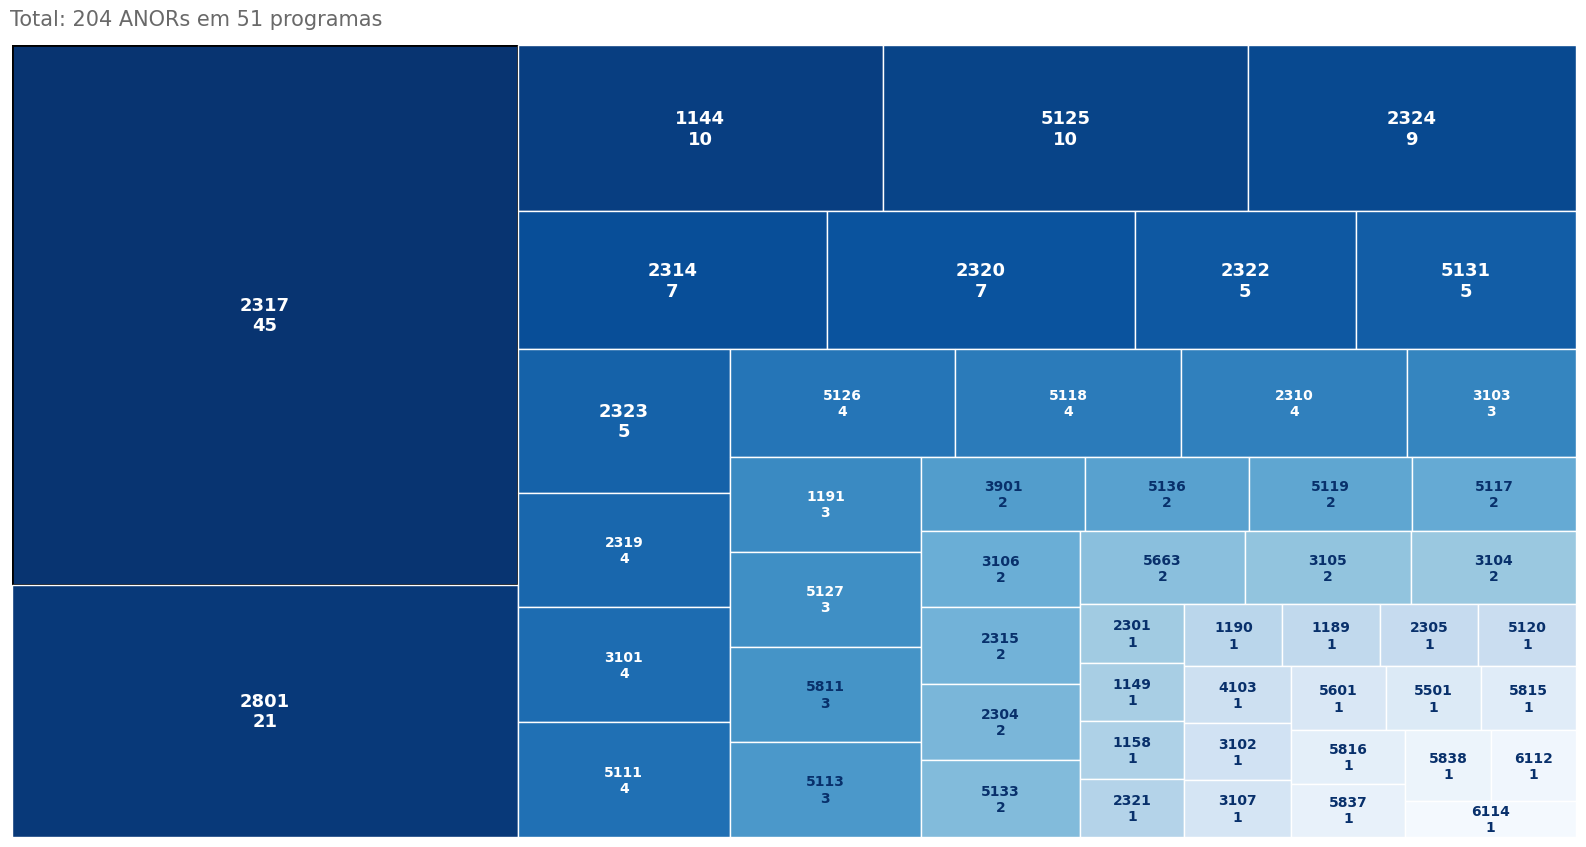

Treemap editorial gerado e salvo com sucesso como 'treemap_anors_programa_ppa_2024_2027_editorial_final.png'.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.patches as patches

# --- Ensure df_excel is loaded ---
if 'df_excel' not in locals() and 'df_excel' not in globals():
    print("Error: 'df_excel' DataFrame is not loaded. Please execute the cell that loads your Excel file (e.g., cell a28296a6) with the correct file path.")
    raise SystemExit("df_excel not found. Please load the data first.")

# --- Define df_treemap_counts and df_treemap_filtered ---
# Group by Programa and Ação Não-Orçamentária to count ANORs
df_treemap_counts = df_excel.groupby(['Programa', 'Ação Não-Orçamentária'], observed=False).size().reset_index(name='Número de ANORs')
# Filter for entries where count is greater than 0
df_treemap_filtered = df_treemap_counts[df_treemap_counts['Número de ANORs'] > 0]

if df_treemap_filtered.empty:
    print("No data available to generate the treemap after filtering for 'Número de ANORs' > 0. Please check your data.")
    raise SystemExit("Filtered DataFrame is empty.")

# --- 1. Prepare data for treemap (total ANORs per Program) ---
# Group by 'Programa' to get the total ANORs for each program
df_program_anors = df_treemap_filtered.groupby('Programa')['Número de ANORs'].sum().reset_index(name='q')

# Convert 'Programa' to string for labeling
df_program_anors["p"] = df_program_anors["Programa"].astype(str)

# Sort values to ensure consistent ordering for squarify and easier identification of top programs
df_program_anors = df_program_anors.sort_values("q", ascending=False).reset_index(drop=True)

# Calculate total ANORs (T) and number of unique programs (N)
T = int(df_program_anors["q"].sum())
N = df_program_anors.shape[0]

# Identify the program with the most ANORs for highlighting
idx_max = df_program_anors["q"].idxmax()
pm = df_program_anors.loc[idx_max, "p"]
qm = int(df_program_anors.loc[idx_max, "q"])

# --- 2. Treemap Generation with Editorial Style ---
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(16, 9))
ax.axis("off") # Hide axes

# Generate color palette: 'Blues' sequential, reversed for darker hues for higher values
pal = sns.color_palette("Blues", n_colors=N)[::-1]

# Prepare sizes for squarify
s = df_program_anors["q"].values
rs = squarify.normalize_sizes(s, 100, 100) # Normalize to 100x100 area
rects = squarify.squarify(rs, 0, 0, 100, 100) # Compute the rectangles positions and dimensions

# Define area_minima for text visibility
area_minima = 20

# --- Draw rectangles and labels ---
for j, (rect, color) in enumerate(zip(rects, pal)):
    x, dx, dy = rect["x"], rect["dx"], rect["dy"]
    # Applying the user's specific y-coordinate adjustment for vertical inversion
    y = 100 - rect["y"] - dy

    programa = df_program_anors.loc[j, "p"]
    qtd = int(df_program_anors.loc[j, "q"])

    # Destaca o programa com mais ANORs (borda mais grossa)
    if df_program_anors.index[j] == idx_max:
        edgecolor = "black"
        linewidth = 2
    else:
        edgecolor = "white"
        linewidth = 1

    ax.add_patch(
        plt.Rectangle(
            (x, y),
            dx,
            dy,
            facecolor=color,
            edgecolor=edgecolor,
            linewidth=linewidth,
            zorder=1 # Ensure rectangles are below text labels
        )
    )

    # --- 5. Texto dentro dos retângulos ---
    area = dx * dy
    is_top10 = j < 10

    if is_top10 or area > area_minima:
        # Coordenadas do centro do retângulo (adjusted for the new y)
        x_center = x + dx / 2
        y_center = y + dy / 2

        # Tamanho de fonte: maior para top10
        if is_top10:
            fontsize = 13 # Increased from 11
        else:
            fontsize = 10 # Increased from 9

        # Define cor do texto com base na luminância da cor de fundo
        R, G, B = color
        luminancia = 0.299 * R + 0.587 * G + 0.114 * B
        text_color = "white" if luminancia < 0.5 else "#08306B"  # azul bem escuro

        # Duas linhas: programa e quantidade
        ax.text(
            x_center,
            y_center,
            f"{programa}\n{qtd}",
            ha="center",
            va="center",
            fontsize=fontsize,
            color=text_color,
            fontweight="bold",
            wrap=True,
            zorder=2 # Ensure text is above rectangles
        )

# Ajusta proporções
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# --- Titles and annotations ---

# Mapping existing variables to user's requested names
total_anors = T
total_programas = N

# New annotation in the upper left corner of the overall figure
fig.text(
    0.01, # X-coordinate: near the far left edge of the figure
    0.98, # Y-coordinate: near the top edge of the figure
    f"Total: {total_anors} ANORs em {total_programas} programas",
    ha="left",
    va="top",
    fontsize=15,
    color="dimgray",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="none", alpha=0.7) # Optional: add a box for better contrast
)

# --- Layout and Saving ---
plt.tight_layout(rect=[0, 0.04, 1, 0.96]) # Adjusted top margin to ensure space for fig.text
plt.savefig("treemap_anors_programa_ppa_2024_2027_editorial_final.png",
            dpi=300, bbox_inches="tight", facecolor="white") # Save in high resolution for Word
plt.show()

print("Treemap editorial gerado e salvo com sucesso como 'treemap_anors_programa_ppa_2024_2027_editorial_final.png'.")

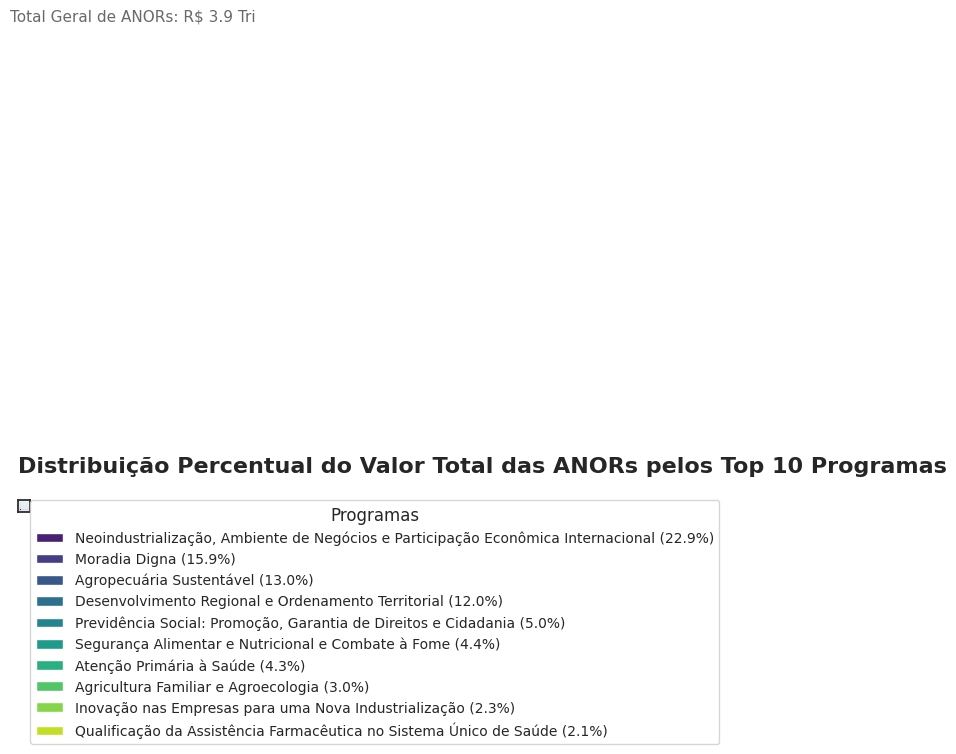

Gráfico Waffle gerado e salvo com sucesso como 'waffle_chart_top10_programas_valor_total.png'.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Certifique-se de que df_excel está carregado
if 'df_excel' not in locals() and 'df_excel' not in globals():
    print("Erro: 'df_excel' DataFrame não está carregado. Por favor, execute a célula que carrega seu arquivo Excel.")
    raise SystemExit("df_excel não encontrado. Carregue os dados primeiro.")

# Recalcular df_top10_valor para garantir que 'Porcentagem' esteja disponível
valor_total_geral = df_excel['Valor Total'].sum()
df_program_valor_total = df_excel.groupby('Título_Programa')['Valor Total'].sum().reset_index()
df_top10_valor = df_program_valor_total.sort_values(by='Valor Total', ascending=False).head(10).copy()
df_top10_valor['Porcentagem'] = (df_top10_valor['Valor Total'] / valor_total_geral) * 100

# Arredondar as porcentagens para inteiros para que se encaixem bem na grade 10x10
# e garantir que a soma seja 100%. Ajuste se necessário.
df_top10_valor['Porcentagem_Int'] = df_top10_valor['Porcentagem'].round().astype(int)

# Ajustar a soma para 100% se houver pequenas diferenças devido ao arredondamento
diff = 100 - df_top10_valor['Porcentagem_Int'].sum()

if diff != 0:
    # Get indices of programs sorted by their current Porcentagem_Int for fair distribution
    # If diff > 0, we add to largest percentages. If diff < 0, we subtract from largest percentages (to avoid negatives)
    sorted_indices_for_adjustment = df_top10_valor.sort_values(by='Porcentagem_Int', ascending=False).index.tolist()

    idx_cycle = 0
    current_diff_to_distribute = diff

    # Distribute the difference one unit at a time, cycling through the sorted programs
    while current_diff_to_distribute != 0:
        # Get the original index from df_top10_valor for the program to be adjusted
        program_original_idx = sorted_indices_for_adjustment[idx_cycle % len(sorted_indices_for_adjustment)]

        if current_diff_to_distribute > 0: # Need to add 1%
            df_top10_valor.loc[program_original_idx, 'Porcentagem_Int'] += 1
            current_diff_to_distribute -= 1
        else: # Need to subtract 1%
            # Only subtract if percentage is positive to avoid negative squares
            if df_top10_valor.loc[program_original_idx, 'Porcentagem_Int'] > 0:
                df_top10_valor.loc[program_original_idx, 'Porcentagem_Int'] -= 1
                current_diff_to_distribute += 1
            # If it's 0, we can't subtract, so we skip this one and try the next in the sorted list.

        idx_cycle += 1
        # Safeguard to prevent infinite loops in extreme cases (e.g., trying to subtract from all zeros)
        if idx_cycle > len(sorted_indices_for_adjustment) * 2 and current_diff_to_distribute != 0:
             print(f"Warning: Adjustment loop ran too many times, breaking. Remaining diff: {current_diff_to_distribute}.")
             break

# Final safeguard: ensure no negative percentages after adjustment
df_top10_valor['Porcentagem_Int'] = df_top10_valor['Porcentagem_Int'].apply(lambda x: max(0, x))

# Final check if sum is exactly 100 (it should be, barring extreme edge cases after above logic)
if df_top10_valor['Porcentagem_Int'].sum() != 100:
    print(f"Warning: Waffle chart percentages do not sum to 100% after final adjustment (sum is {df_top10_valor['Porcentagem_Int'].sum()}). Displaying raw rounded percentages as fallback.")
    # Fallback to direct rounded percentages if an issue persists
    df_top10_valor['Porcentagem_Int'] = df_top10_valor['Porcentagem'].round().astype(int)
    df_top10_valor['Porcentagem_Int'] = df_top10_valor['Porcentagem_Int'].apply(lambda x: max(0, x)) # ensure no negatives from fallback

# Ensure df_top10_valor is sorted by Valor Total descending before preparing lists for the waffle chart
df_top10_valor = df_top10_valor.sort_values(by='Valor Total', ascending=False).copy()
program_names = df_top10_valor['Título_Programa'].tolist()
program_percentages = df_top10_valor['Porcentagem_Int'].tolist()

# Configurações do waffle chart
width = 10  # Largura da grade (e.g., 10 células)
height = 10 # Altura da grade (e.g., 10 células)
total_squares = width * height

# Crie uma grade vazia
waffle_grid = np.zeros((height, width), dtype=int)

# Preencha a grade com os valores dos programas
program_idx = 0
current_cell = 0
for i in range(len(program_percentages)):
    num_cells = int(program_percentages[i]) # Use the integer percentage
    for _ in range(num_cells):
        if current_cell < total_squares:
            row = current_cell // width
            col = current_cell % width
            waffle_grid[row, col] = program_idx + 1 # +1 para evitar 0
            current_cell += 1
    program_idx += 1

# Gerar o gráfico waffle
fig, ax = plt.subplots(figsize=(10, 10))

cmap = sns.color_palette('viridis', n_colors=len(program_names))

# Desenhar os quadrados do waffle chart
for r in range(height):
    for c in range(width):
        idx = waffle_grid[r, c]
        if idx > 0:
            color = cmap[idx - 1] # -1 para obter o índice correto da cor
            ax.add_patch(plt.Rectangle((c, r), 0.9, 0.9, color=color, ec='white', lw=0.5))

ax.set_xticks(np.arange(0, width, 1))
ax.set_yticks(np.arange(0, height, 1))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_aspect('equal')
ax.tick_params(axis='both', which='both', length=0)

# Título
plt.title('Distribuição Percentual do Valor Total das ANORs pelos Top 10 Programas', fontsize=16, fontweight='bold', loc='left', pad=20)

# Adicionar a legenda manualmente
patch_list = []
for i, name in enumerate(program_names):
    patch_list.append(plt.Rectangle((0, 0), 1, 1, fc=cmap[i]))

# Formatar o valor total para anotação
def format_currency_short(value):
    if value >= 1e12: # Trilhões
        return f'R$ {value*1e-12:.1f} Tri'
    elif value >= 1e9: # Bilhões
        return f'R$ {value*1e-9:.1f} Bi'
    elif value >= 1e6: # Milhões
        return f'R$ {value*1e-6:.1f} Mi'
    else:
        return f'R$ {value:.0f}'

# Anotação de contexto no canto superior esquerdo
fig.text(0.01, 0.95,
         f'Total Geral de ANORs: {format_currency_short(valor_total_geral)}',
         ha='left', va='top', fontsize=11, color='dimgray')

# Ajustar porcentagens para exibição na legenda
legend_labels = []
for i, name in enumerate(program_names):
    # Use a porcentagem original para a legenda para maior precisão
    original_perc = df_top10_valor.loc[df_top10_valor['Título_Programa'] == name, 'Porcentagem'].iloc[0]
    legend_labels.append(f'{name} ({original_perc:.1f}%)')


ax.legend(patch_list, legend_labels,
          bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.,
          title='Programas', title_fontsize=12, fontsize=10)

plt.tight_layout(rect=[0, 0, 0.75, 0.95]) # Ajusta para dar espaço à legenda
plt.savefig("waffle_chart_top10_programas_valor_total.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("Gráfico Waffle gerado e salvo com sucesso como 'waffle_chart_top10_programas_valor_total.png'.")

In [55]:
import pandas as pd

# Certifique-se de que df_excel está carregado
if 'df_excel' not in locals() and 'df_excel' not in globals():
    print("Erro: 'df_excel' DataFrame não está carregado. Por favor, execute a célula que carrega seu arquivo Excel.")
    raise SystemExit("df_excel não encontrado. Carregue os dados primeiro.")

# 1. Agrupar por Título_Programa e Nome do órgão e somar o Valor Total para cada combinação
df_programas_por_orgao = df_excel.groupby(['Título_Programa', 'Nome do órgão'])['Valor Total'].sum().reset_index()

# 2. Ordenar pelo Valor Total para encontrar os programas de maior valor (independentemente do órgão)
top_programas_geral = df_programas_por_orgao.sort_values(by='Valor Total', ascending=False).head(10)

print("Top 10 Programas (e seus órgãos associados) por Valor Total:")
display(top_programas_geral)

# 3. Verificar se algum Nome do órgão aparece mais de uma vez na lista dos Top 10 Programas
orgaos_no_top10_programas = top_programas_geral['Nome do órgão'].value_counts()

# Filtrar órgãos que aparecem mais de uma vez
orgaos_com_multiplos_programas_no_top10 = orgaos_no_top10_programas[orgaos_no_top10_programas > 1]

if not orgaos_com_multiplos_programas_no_top10.empty:
    print("\nSim, o(s) seguinte(s) órgão(s) tem/têm mais de um programa no TOP 10 de programas por valor total:")
    display(orgaos_com_multiplos_programas_no_top10)
    # Opcional: mostrar quais programas são
    for orgao in orgaos_com_multiplos_programas_no_top10.index:
        print(f"\nProgramas do órgão '{orgao}' no TOP 10:")
        display(top_programas_geral[top_programas_geral['Nome do órgão'] == orgao])
else:
    print("\nNão, nenhum órgão tem mais de um programa no TOP 10 de programas por valor total.")

Top 10 Programas (e seus órgãos associados) por Valor Total:


,Título_Programa,Nome do órgão,Valor Total
26,"Neoindustrialização, Ambiente de Negócios e Pa...","Ministério do Desenvolvimento, Indústria, Comé...",8.925321e+11
25,Moradia Digna,Ministério das Cidades,6.185741e+11
1,Agropecuária Sustentável,Ministério da Agricultura e Pecuária,5.065677e+11
11,Desenvolvimento Regional e Ordenamento Territo...,Ministério da Integração e do Desenvolvimento ...,4.673058e+11
31,"Previdência Social: Promoção, Garantia de Dire...",Ministério da Previdência Social,1.954572e+11
44,Segurança Alimentar e Nutricional e Combate à ...,Ministério do Desenvolvimento e Assistência So...,1.709933e+11
3,Atenção Primária à Saúde,Ministério da Saúde,1.677289e+11
0,Agricultura Familiar e Agroecologia,Ministério do Desenvolvimento Agrário e Agricu...,1.173742e+11
22,Inovação nas Empresas para uma Nova Industrial...,"Ministério da Ciência, Tecnologia e Inovação",9.059373e+10
40,Qualificação da Assistência Farmacêutica no Si...,Ministério da Saúde,8.338571e+10



Sim, o(s) seguinte(s) órgão(s) tem/têm mais de um programa no TOP 10 de programas por valor total:


,count
Nome do órgão,
Ministério da Saúde,2



Programas do órgão 'Ministério da Saúde' no TOP 10:


,Título_Programa,Nome do órgão,Valor Total
3,Atenção Primária à Saúde,Ministério da Saúde,1.677289e+11
40,Qualificação da Assistência Farmacêutica no Si...,Ministério da Saúde,8.338571e+10


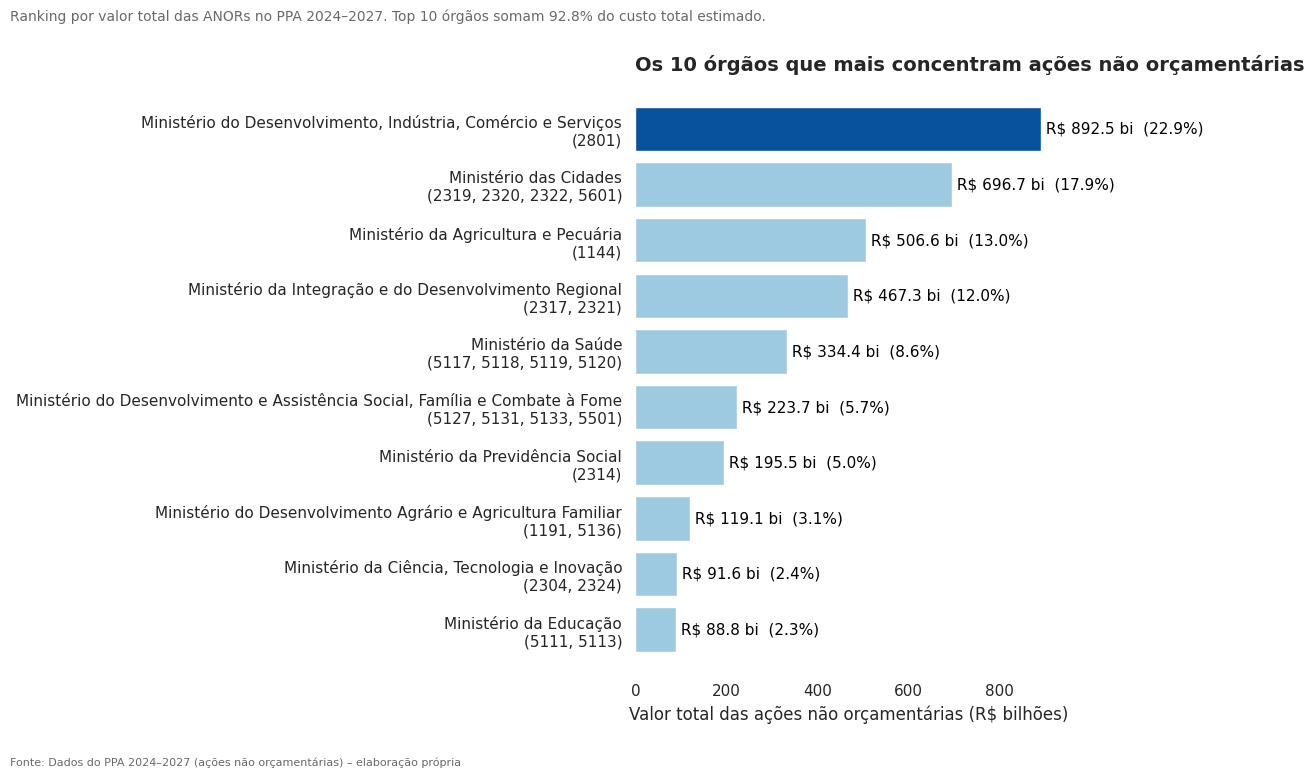

Gráfico de barras estilo data journalism para órgãos gerado e salvo com sucesso como 'bar_chart_top10_orgaos_data_journalism.png'.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Dados ===
# Certifique-se de que df_excel está carregado
if 'df_excel' not in locals() and 'df_excel' not in globals():
    print("Erro: 'df_excel' DataFrame não está carregado. Por favor, execute a célula que carrega seu arquivo Excel.")
    raise SystemExit("df_excel não encontrado. Carregue os dados primeiro.")

# Agrupa por 'Nome do órgão' e soma o 'Valor Total'
grp = (
    df_excel.groupby("Nome do órgão", as_index=False)["Valor Total"]
      .sum()
      .rename(columns={"Valor Total": "valor"})
)

# Ordena e pega top 10
top10 = grp.sort_values("valor", ascending=False).head(10).copy() # Use .copy() para evitar SettingWithCopyWarning
total_geral = grp["valor"].sum()
top10["share"] = top10["valor"] / total_geral * 100

# --- MODIFICAÇÃO: Listar todos os Programas únicos para cada órgão do top 10 ---
programas_por_orgao = {}
for orgao in top10["Nome do órgão"]:
    # Coleta todos os Programas únicos associados a este órgão no df_excel
    progs = sorted(df_excel[df_excel["Nome do órgão"] == orgao]["Programa"].unique().tolist())
    progs_str = ", ".join(str(p) for p in progs)
    programas_por_orgao[orgao] = progs_str

top10["programas"] = top10["Nome do órgão"].map(programas_por_orgao)

# Cria o rótulo combinado com quebra de linha para os programas
top10["label"] = top10["Nome do órgão"] + "\n(" + top10["programas"] + ")"

# Calcula a participação no total geral
top10["share"] = top10["valor"] / total_geral * 100

# Converte para bilhões de reais
top10["valor_bilhoes"] = top10["valor"] / 1e9

# Ordena para plot (maior em cima no barh)
top10 = top10.sort_values("valor_bilhoes", ascending=True)

# === 2. Estilo ===
sns.set_theme(style="white") # Mantendo o estilo sem grades
plt.rcParams["font.family"] = "DejaVu Sans"

fig, ax = plt.subplots(figsize=(12, 8)) # Ajustado o tamanho para melhor visualização

base_color = "#9ecae1"
highlight_color = "#08519c"
colors = [base_color] * len(top10)
colors[-1] = highlight_color  # o maior valor (último após sort asc)

# === 3. Gráfico de barras horizontais ===
ax.barh(
    top10["label"], # USANDO O NOVO RÓTULO COMBINADO COM TODOS OS PROGRAMAS
    top10["valor_bilhoes"],
    color=colors
)

# Rótulos nas barras
for y_pos, v_bilhoes, s_percent in zip(top10["label"], # USANDO O NOVO RÓTULO COMBINADO
                                       top10["valor_bilhoes"],
                                       top10["share"]):
    ax.text(
        v_bilhoes, # Posição x é o valor em bilhões da barra
        y_pos, # Posição y é o rótulo do órgão
        f" R$ {v_bilhoes:,.1f} bi  ({s_percent:.1f}%)", # Formato: R$ X.X bi (Y.Y%)
        va="center",
        ha="left", # Alinha à esquerda do texto
        fontsize=11, # Aumentado de 10 para 11
        color="black"
    )

# Remove 'ticks' e bordas para um visual mais limpo
ax.tick_params(axis='x', length=0)
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# === 4. Títulos e narrativa ===
participacao_top10 = top10["share"].sum()

titulo = "Os 10 órgãos que mais concentram ações não orçamentárias"
subtitulo = (
    f"Ranking por valor total das ANORs no PPA 2024–2027. "
    f"Top 10 órgãos somam {participacao_top10:.1f}% do custo total estimado."
)

# Título principal do gráfico
ax.set_title(titulo, fontsize=14, fontweight="bold", loc="left") # Conforme seu snippet

# Subtítulo com fig.text para posicionamento flexível na figura
plt.figtext(0.01, 0.94, subtitulo, ha="left", fontsize=10, color="dimgray") # Conforme seu snippet

ax.set_xlabel("Valor total das ações não orçamentárias (R$ bilhões)") # Conforme seu snippet
ax.set_ylabel("") # Conforme seu snippet

for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False) # Conforme seu snippet

# Linha de crédito no rodapé
plt.figtext(
    0.01, 0.01,
    "Fonte: Dados do PPA 2024–2027 (ações não orçamentárias) – elaboração própria",
    ha="left", fontsize=8, color="dimgray" # Conforme seu snippet
)

# === 5. Layout e Salvar ===
plt.tight_layout(rect=[0, 0.04, 1, 0.92]) # Ajustei o rect para acomodar o subtítulo e rodapé
plt.savefig("bar_chart_top10_orgaos_data_journalism.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("Gráfico de barras estilo data journalism para órgãos gerado e salvo com sucesso como 'bar_chart_top10_orgaos_data_journalism.png'.")

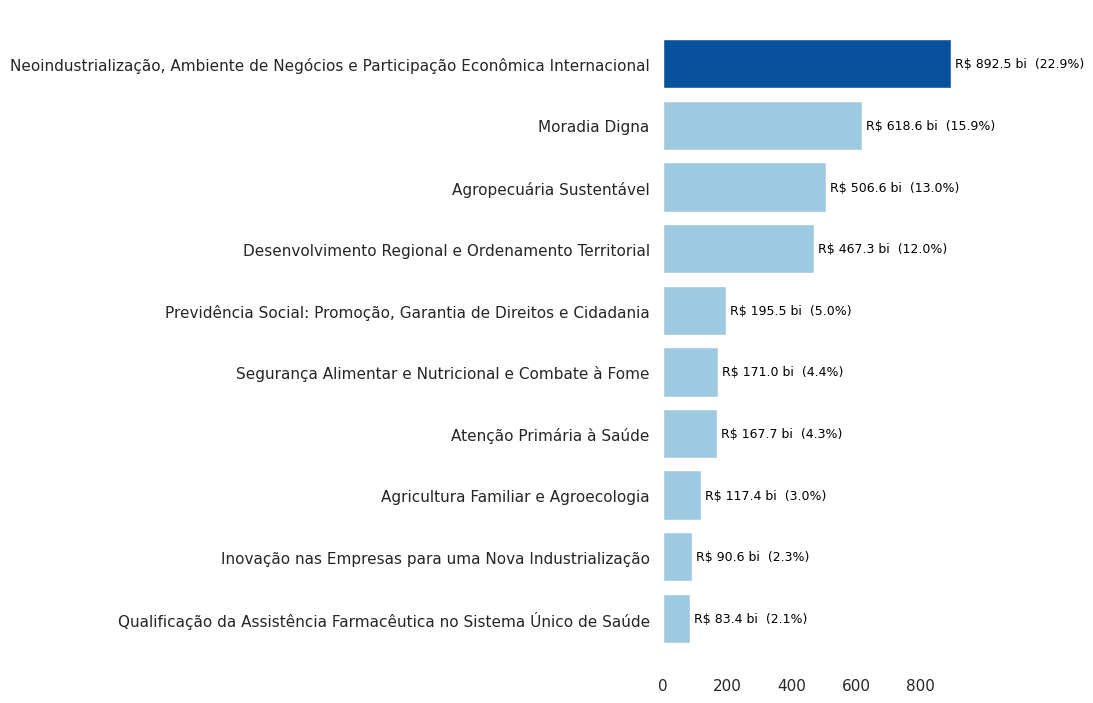

Gráfico de barras estilo data journalism gerado e salvo com sucesso como 'bar_chart_top10_programas_data_journalism.png'.


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Certifique-se de que df_excel está carregado
if 'df_excel' not in locals() and 'df_excel' not in globals():
    print("Erro: 'df_excel' DataFrame não está carregado. Por favor, execute a célula que carrega seu arquivo Excel.")
    raise SystemExit("df_excel não encontrado. Carregue os dados primeiro.")

# Agrupar por Título_Programa e somar o Valor Total
grp = (
    df_excel.groupby("Título_Programa", as_index=False)["Valor Total"]
      .sum()
      .rename(columns={"Valor Total": "valor"})
)

# Ordena e pega top 10
top10 = grp.sort_values("valor", ascending=False).head(10).copy() # Use .copy() to avoid SettingWithCopyWarning
total_geral = grp["valor"].sum()
top10["share"] = top10["valor"] / total_geral * 100

# Converte para bilhões de reais
top10["valor_bilhoes"] = top10["valor"] / 1e9

# Ordena para plot (maior em cima)
top10 = top10.sort_values("valor_bilhoes", ascending=True)

# === 2. Estilo ===
sns.set_theme(style="white") # Changed style to 'white' to remove grid by default
plt.rcParams["font.family"] = "DejaVu Sans" # ou outra fonte disponível, ex: 'sans-serif'

fig, ax = plt.subplots(figsize=(12, 8)) # Aumentei um pouco o tamanho para melhor legibilidade

# Cor base e destaque para o maior
base_color = "#9ecae1"
highlight_color = "#08519c"
colors = [base_color] * len(top10)
colors[-1] = highlight_color  # o maior valor (último após sort asc)

# === 3. Gráfico de barras horizontais ===
ax.barh(
    top10["Título_Programa"],
    top10["valor_bilhoes"],
    color=colors
)

# Rótulos nas barras
for y_pos, v, s in zip(top10["Título_Programa"],
                  top10["valor_bilhoes"],
                  top10["share"]):
    ax.text(
        v, # Posição x é o valor da barra
        y_pos, # Posição y é o rótulo do programa
        f" R$ {v:,.1f} bi  ({s:.1f}%)", # Formato: R$ X.X bi (Y.Y%)
        va="center",
        ha="left", # Alinha à esquerda do texto
        fontsize=9,
        color="black"
    )

# Remove a linha vertical do eixo X
ax.tick_params(axis='x', length=0)
ax.set_frame_on(False) # Remove as bordas do gráfico
ax.xaxis.set_ticks_position('none') # Remove os 'ticks' do eixo x
ax.yaxis.set_ticks_position('none') # Remove os 'ticks' do eixo y

# --- Layout e Salvar ---
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95]) # Ajustei o rect para remover espaço de título/subtítulo
plt.savefig("bar_chart_top10_programas_data_journalism.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("Gráfico de barras estilo data journalism gerado e salvo com sucesso como 'bar_chart_top10_programas_data_journalism.png'.")